In [101]:
import pandas as pd
!pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install squarify
import squarify
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression




df=pd.read_csv('all_fuels_data.csv')
df


ticker        commodity        date       open       high        low  \
0       CL=F        Crude Oil  2000-08-23  31.950001  32.799999  31.950001   
1       CL=F        Crude Oil  2000-08-24  31.900000  32.240002  31.400000   
2       CL=F        Crude Oil  2000-08-25  31.700001  32.099998  31.320000   
3       CL=F        Crude Oil  2000-08-28  32.040001  32.919998  31.860001   
4       CL=F        Crude Oil  2000-08-29  32.820000  33.029999  32.560001   
...      ...              ...         ...        ...        ...        ...   
28070   BZ=F  Brent Crude Oil  2024-06-17  82.620003  84.550003  82.110001   
28071   BZ=F  Brent Crude Oil  2024-06-18  84.400002  85.480003  83.660004   
28072   BZ=F  Brent Crude Oil  2024-06-20  85.379997  85.970001  84.889999   
28073   BZ=F  Brent Crude Oil  2024-06-21  85.680000  86.230003  84.839996   
28074   BZ=F  Brent Crude Oil  2024-06-24  85.089996  86.169998  84.730003   

           close  volume  
0      32.049999   79385  
1      31.629999   72978  
2      32.049999   44601  
3      32.869999   46770  
4      32.720001   49131  
...          ...     ...  
28070  84.250000   32978  
28071  85.330002   45690  
28072  85.709999   52543  
28073  85.239998   25055  
28074  86.010002   25055  

[28075 rows x 8 columns]

In [85]:
df.shape

(28075, 8)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28075 entries, 0 to 28074
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28075 non-null  object 
 1   commodity  28075 non-null  object 
 2   date       28075 non-null  object 
 3   open       28075 non-null  float64
 4   high       28075 non-null  float64
 5   low        28075 non-null  float64
 6   close      28075 non-null  float64
 7   volume     28075 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [87]:
df.head()

ticker  commodity        date       open       high        low      close  \
0   CL=F  Crude Oil  2000-08-23  31.950001  32.799999  31.950001  32.049999   
1   CL=F  Crude Oil  2000-08-24  31.900000  32.240002  31.400000  31.629999   
2   CL=F  Crude Oil  2000-08-25  31.700001  32.099998  31.320000  32.049999   
3   CL=F  Crude Oil  2000-08-28  32.040001  32.919998  31.860001  32.869999   
4   CL=F  Crude Oil  2000-08-29  32.820000  33.029999  32.560001  32.720001   

   volume  
0   79385  
1   72978  
2   44601  
3   46770  
4   49131

In [88]:
df.tail()

ticker        commodity        date       open       high        low  \
28070   BZ=F  Brent Crude Oil  2024-06-17  82.620003  84.550003  82.110001   
28071   BZ=F  Brent Crude Oil  2024-06-18  84.400002  85.480003  83.660004   
28072   BZ=F  Brent Crude Oil  2024-06-20  85.379997  85.970001  84.889999   
28073   BZ=F  Brent Crude Oil  2024-06-21  85.680000  86.230003  84.839996   
28074   BZ=F  Brent Crude Oil  2024-06-24  85.089996  86.169998  84.730003   

           close  volume  
28070  84.250000   32978  
28071  85.330002   45690  
28072  85.709999   52543  
28073  85.239998   25055  
28074  86.010002   25055

In [89]:
df.describe()

open          high           low         close        volume
count  28075.000000  28075.000000  28075.000000  28075.000000  2.807500e+04
mean      27.288994     27.680580     26.873389     27.287224  1.059926e+05
std       36.085625     36.540236     35.599243     36.089001  1.484400e+05
min      -14.000000      0.507000    -40.320000    -37.630001  0.000000e+00
25%        2.031000      2.060550      1.998200      2.031250  2.641100e+04
50%        3.374000      3.450000      3.301000      3.375900  4.903300e+04
75%       54.895000     55.745001     53.910000     54.900000  1.147245e+05
max      146.080002    147.429993    144.270004    146.080002  2.288230e+06

In [90]:
df.columns

Index(['ticker', 'commodity', 'date', 'open', 'high', 'low', 'close',
       'volume'],
      dtype='object')

In [91]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

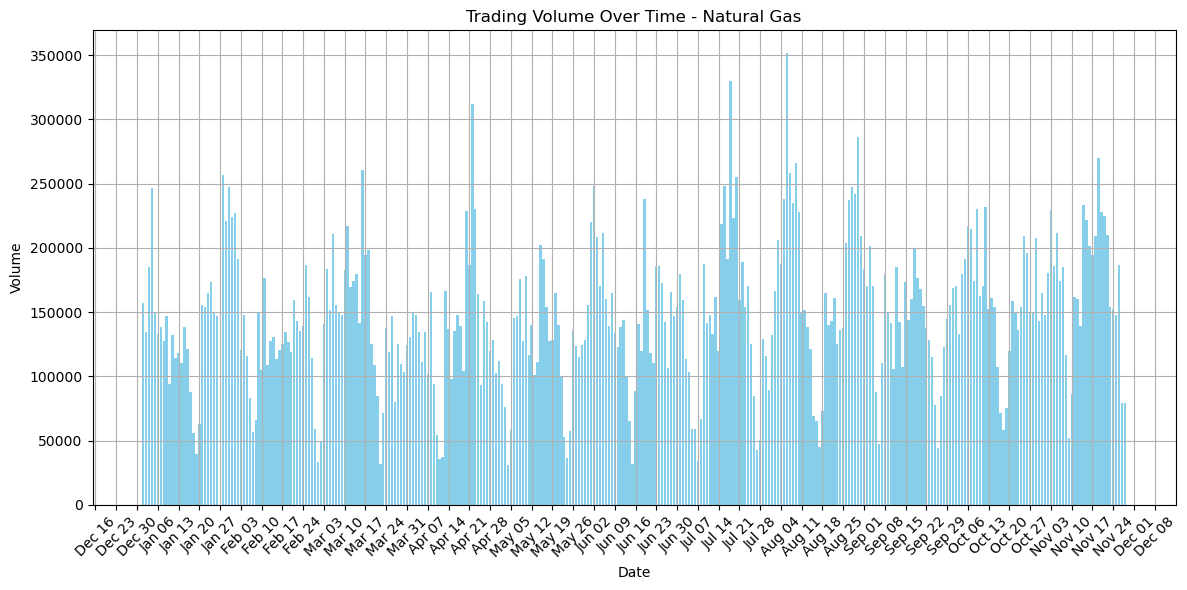

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter a smaller range for clarity
subset = df[(df['commodity'] == 'Natural Gas') & 
            (df['date'] >= '2023-03-01') & (df['date'] <= '2025-05-01')]

plt.figure(figsize=(12, 6))
plt.bar(subset['date'], subset['volume'], color='skyblue')

# Format date axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., Mar 15
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.title('Trading Volume Over Time - Natural Gas')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



#Volume Chart

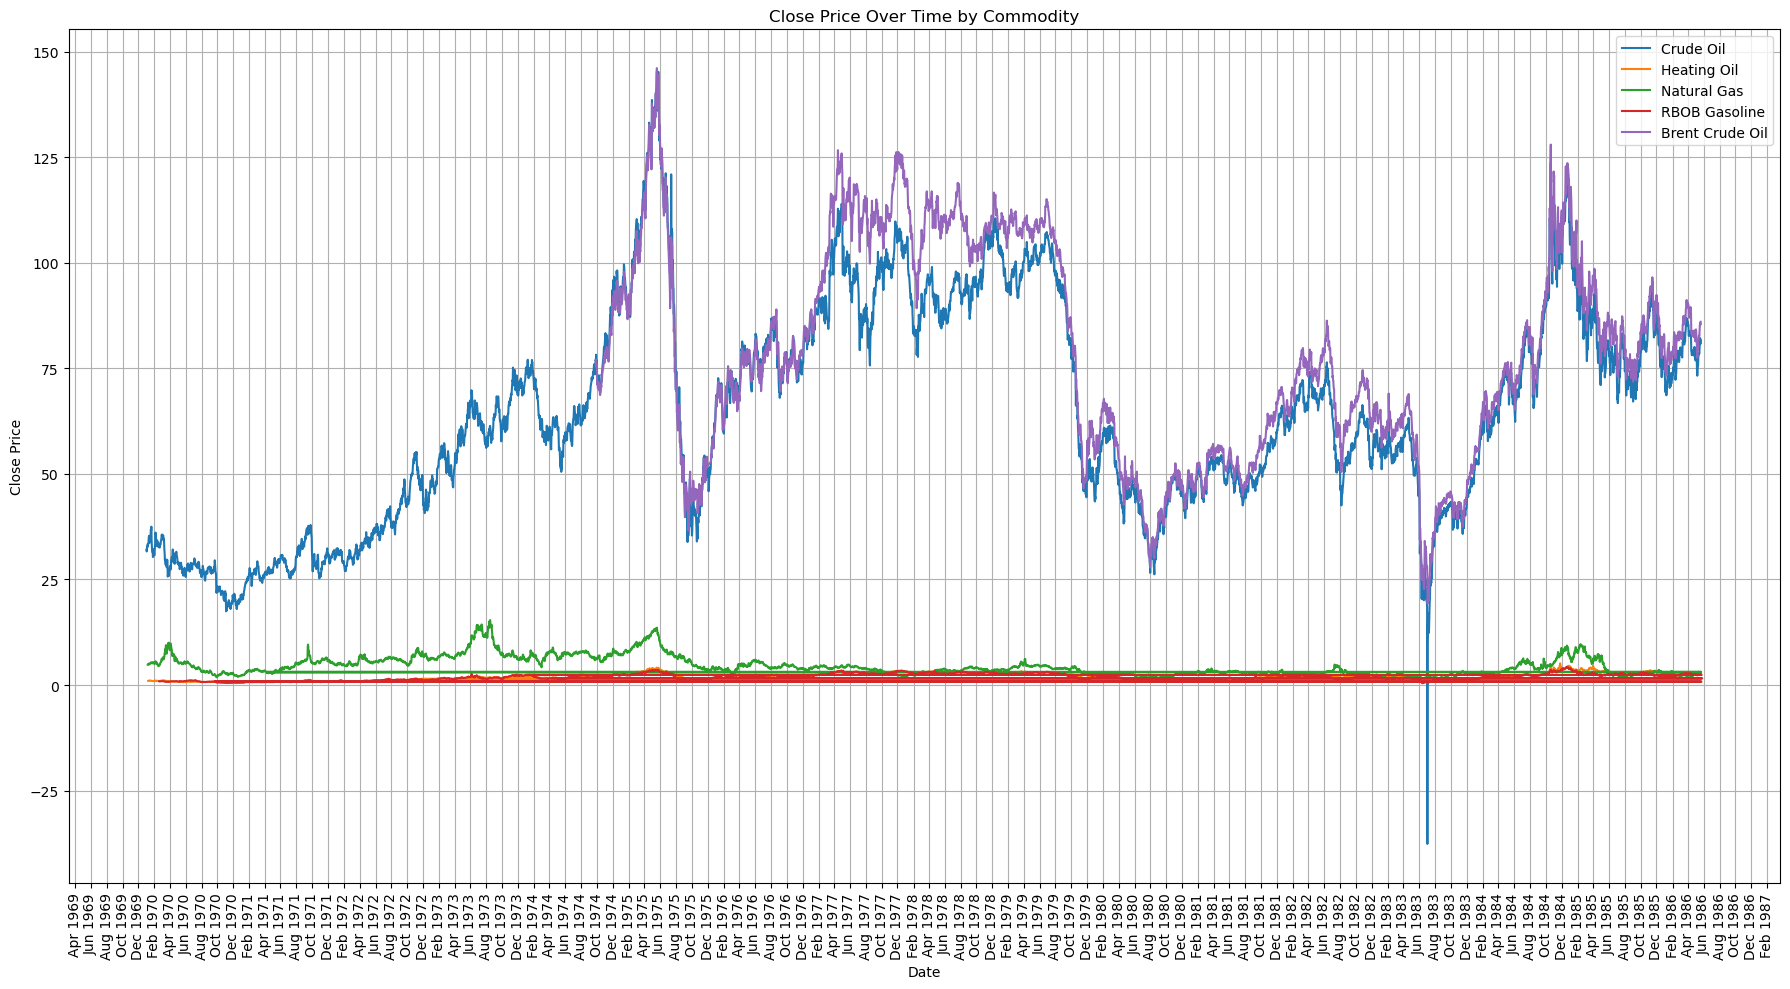

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18, 10))



for commodity in df['commodity'].unique():
    subset = df[df['commodity'] == commodity]
    plt.plot(subset['date'], subset['close'], label=commodity)


ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.xticks(rotation=90)

plt.title('Close Price Over Time by Commodity')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Line chart

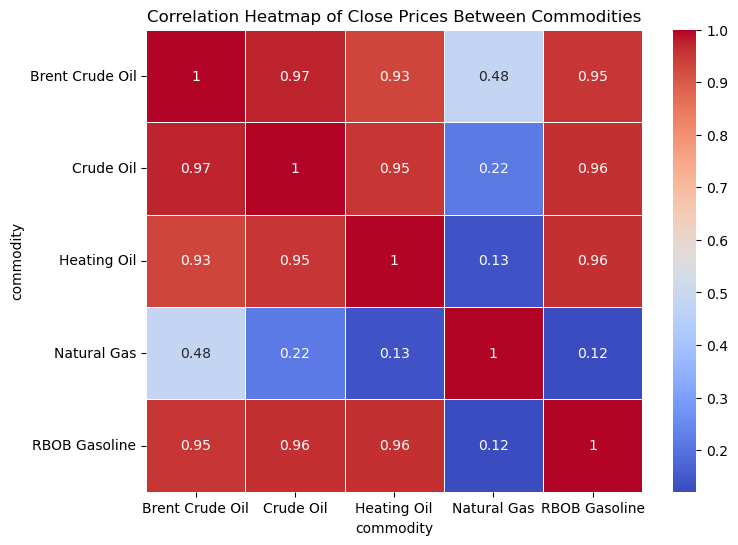

In [94]:

import seaborn as sns
pivot_df = df.pivot(index='date', columns='commodity', values='close')

correlation_matrix = pivot_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Close Prices Between Commodities')
plt.show()

#Heat mapppppppppppppp

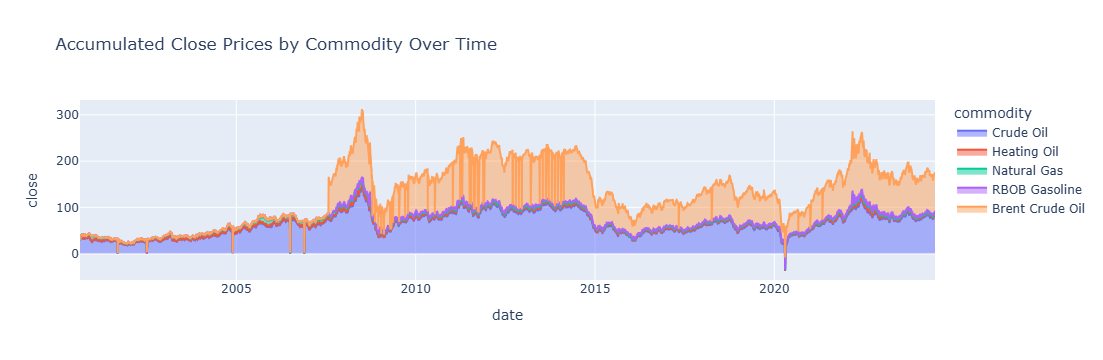

In [95]:
import plotly.express as px


fig = px.area(df, x='date', y='close', color='commodity',
              title='Accumulated Close Prices by Commodity Over Time')
fig.show()

#  area chart

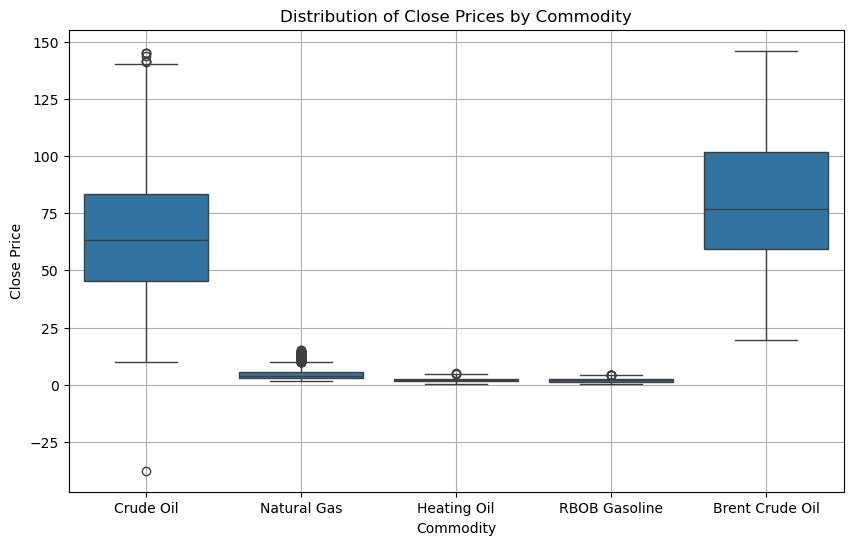

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='commodity', y='close', data=df)
plt.title('Distribution of Close Prices by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


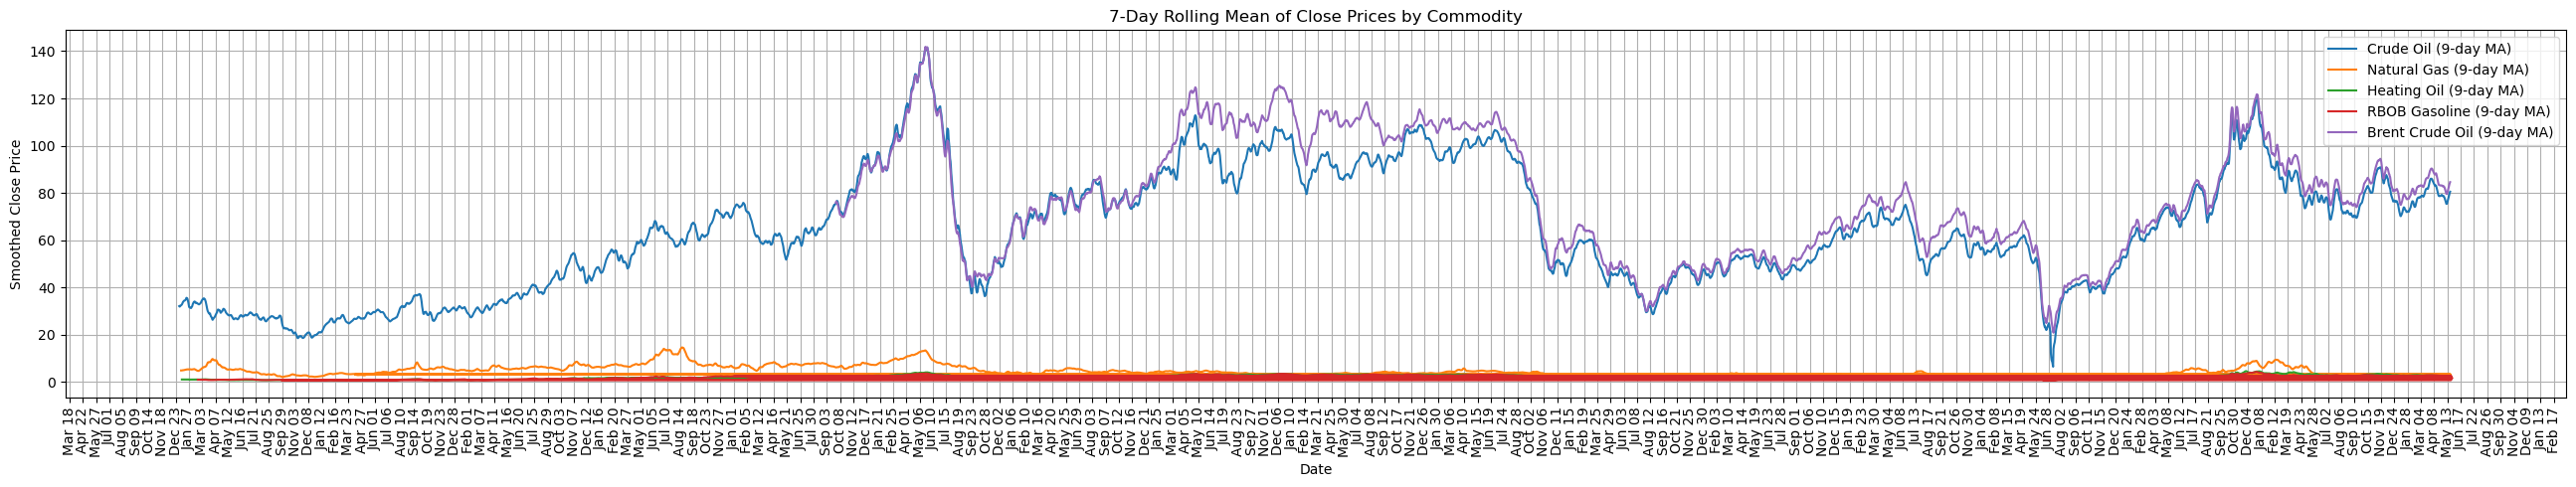

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure your data is sorted by date
df = df.sort_values(by='date')

# Calculate rolling mean correctly
df['rolling_mean'] = df.groupby('commodity')['close'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plot
plt.figure(figsize=(26, 5))
for commodity in df['commodity'].unique():
    subset = df[df['commodity'] == commodity]
    plt.plot(subset['date'], subset['rolling_mean'], label=f'{commodity} (9-day MA)')

# Clean X-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
plt.xticks(rotation=90)

plt.title('7-Day Rolling Mean of Close Prices by Commodity')
plt.xlabel('Date')
plt.ylabel('Smoothed Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





#rolling mean

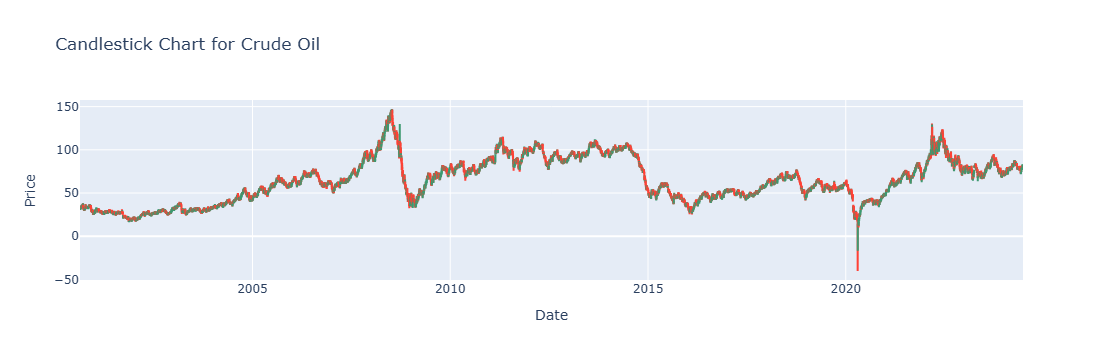

In [70]:
import plotly.graph_objects as go

sample_commodity = 'Crude Oil'
sample_df = df[df['commodity'] == sample_commodity]

fig = go.Figure(data=[go.Candlestick(x=sample_df['date'],
                                     open=sample_df['open'],
                                     high=sample_df['high'],
                                     low=sample_df['low'],
                                     close=sample_df['close'])])
fig.update_layout(title=f'Candlestick Chart for {sample_commodity}',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)
fig.show()





#candlestick plot
# In this cahrt we are using plotly graph reference

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
features = ['open', 'high', 'low', 'volume']
target = 'close'

df_rf = df.dropna(subset=features + [target])  
X = df_rf[features]
y = df_rf[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train model Predict and evaluat
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest R² Score:", r2_score(y_test, y_pred))


Random Forest MSE: 0.16426197550176516
Random Forest R² Score: 0.9998728121404998


In [82]:
from sklearn.ensemble import IsolationForest


X = df_rf[features]


iso_forest = IsolationForest(contamination=0.05, random_state=40)
df_rf['anomaly_score'] = iso_forest.fit_predict(X)

# Anomalies are marked as -1
anomalies = df_rf[df_rf['anomaly_score'] == -1]
print("Anomalies:")
print(anomalies[['commodity', 'date', 'close']].head())


#  isolation forest algorithm

Anomalies:
     commodity        date      close
137  Crude Oil  2001-03-13  27.450001
211  Crude Oil  2001-06-27  25.610001
214  Crude Oil  2001-07-02  25.950001
256  Crude Oil  2001-08-30  26.549999
262  Crude Oil  2001-09-10  27.629999


In [99]:
#EDA

print(df.shape)
print(df.info())
print(df.describe)
print(df.columns)
print(df.isnull().sum())

(28075, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28075 entries, 0 to 28074
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28075 non-null  object 
 1   commodity  28075 non-null  object 
 2   date       28075 non-null  object 
 3   open       28075 non-null  float64
 4   high       28075 non-null  float64
 5   low        28075 non-null  float64
 6   close      28075 non-null  float64
 7   volume     28075 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB
None
<bound method NDFrame.describe of       ticker        commodity        date       open       high        low  \
0       CL=F        Crude Oil  2000-08-23  31.950001  32.799999  31.950001   
1       CL=F        Crude Oil  2000-08-24  31.900000  32.240002  31.400000   
2       CL=F        Crude Oil  2000-08-25  31.700001  32.099998  31.320000   
3       CL=F        Crude Oil  2000-08-28  32.040001  32.919998  31.